# CHAPTER 8: Convex Functions

### This code runs simulations for Example 3 and generates Figures 3, 5 and 6 from Chapter 8: Convex Functions (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib

Required Functions:

1. find_minimizers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from find_minimizers import find_minimizers

## Strong Convexity

Comparing $(8.19)$ with $(8.17)$, we conclude that strong convexity implies strict convexity. Therefore, every strongly convex function has a unique global minimum as well. Nevertheless, strong convexity is a stronger requirement than strict convexity so that functions exist that are strictly convex but not necessarily strongly convex. For example, for scalar arguments $z$, the function $g(z)=z^4$ is strictly convex but not strongly convex. On the other hand, the function $g(z)=z^2$ is strongly convex --- see Fig.$~8.3$. In summary, it holds that:

$$
{
\bf\textbf{strong convexity}\;\Longrightarrow\;\textbf{strict convexity}\;\Longrightarrow\;
\textbf{convexity}} \quad \textnormal{(8.20)}
$$

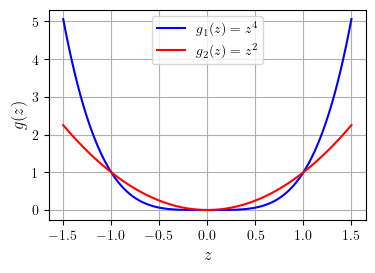

In [11]:
n = 0
x_values = np.arange(-1.5, 1.51, 0.01)
g1 = np.zeros_like(x_values)
g2 = np.zeros_like(x_values)

for x in x_values:
    g1[n] = x**4
    g2[n] = x**2
    n += 1

# figure 3 (illustrating strictly vs strongly-convex functions)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=9,6
plt.figure()

plt.subplot(221)
plt.plot(x_values, g1, '-b', label='$g_1(z) = z^4$')
plt.plot(x_values, g2, '-r', label='$g_2(z) = z^2$')
plt.xlabel('$z$', fontsize=12)
plt.ylabel('$g(z)$', fontsize=12)
plt.grid(True)
plt.axis('tight')
plt.legend()

plt.show()

**Figure 8.3** The function $g(z)=z^4$ is strictly convex but not strongly convex, while the function $g(z)=z^2$ is strongly convex. Observe how $g(z)=z^4$ is more flat around its global minimizer and moves away from it more slowly than in the quadratic case. 

## Example 8.3 (Strongly-convex functions)

The following is a list of useful strongly convex functions that appear in applications involving inference and learning:

   **$(1)$** Consider the quadratic function
   
   $$
   g(z) = \kappa + 2a^{\sf T} z + z^{\sf T} C z, \quad a, z \in \mathbb{R}^{M}, \quad \kappa \in \mathbb{R} \quad \text{(8.32)}
   $$
   
   with a symmetric positive-definite matrix $C$. The Hessian matrix is $\nabla_z^2 g(z) = 2C$, which is sufficiently bounded away from zero for all $z$ since
   
   $$
   \nabla_z^2 g(z) \geq 2\lambda_{\text{min}}(C) \cdot I_{M} > 0 \quad \text{(8.33)}
   $$
   
   in terms of the smallest eigenvalue of $C$. Therefore, such quadratic functions are strongly convex.

   The top row in Fig.$~8.5$ shows a surface plot for the quadratic function ($8.32$) for $z \in \mathbb{R}^{2}$ along with its contour lines for the following (randomly generated) parameter values:
   
   $$
   C = \begin{bmatrix}
   3.3784 & 0 \\
   0 & 3.4963
   \end{bmatrix}, \quad
   a = \begin{bmatrix}
   0.4505 \\
   0.0838
   \end{bmatrix}, \quad
   \kappa = 0.5 \quad \text{(8.34)}
   $$
   
   The minimum of the corresponding $g(z)$ occurs at location:
   
   $$
   z^o \approx \begin{bmatrix}
   0.1334 \\
   0.0240
   \end{bmatrix}, \quad \text{with} \quad g(z^o) \approx 0.4379 \quad \text{(8.35)}
   $$
   
   The individual entries of $z$ are denoted by $z = \text{col}\{z_1, z_2\}$. Recall that a contour line of a function $g(z)$ is a curve along which the value of the function remains invariant. In this quadratic case, the location of the minimizer $z^o$ can be determined in closed form and is given by $z^{o} = C^{-1}a$. In the plot, the surface curve is determined by evaluating $g(z)$ on a dense grid with values of $(z_1, z_2)$ varying in the range $[-2, 2]$ in small steps of size $0.01$. The location of $z^o$ is approximated by determining the grid location where the surface attains its smallest value. This approximate numerical evaluation is applied to the other two examples below involving logistic and hinge functions where closed form expressions for $z^o$ are not readily available. In later chapters, we are going to introduce recursive algorithms, of the gradient-descent type, and also of the subgradient and proximal gradient type, which will allow us to seek the minimizers of strongly convex functions in a more systematic manner.
   
   **$(2)$** Consider next the regularized logistic (or log-)loss function:
   
   $$
   g(z) = \ln(1 + e^{-\gamma h^{\sf T} z}) + \frac{\rho}{2}\|z\|^2, \quad z \in \mathbb{R}^{M} \quad \text{(8.36)}
   $$
   
   with a scalar $\gamma$, column vector $h$, and $\rho > 0$. This function is also strongly convex, as can be seen from examining its Hessian matrix:
   
   $$
   \nabla_z^2 g(z) = \rho \cdot I_M + \left(\frac{e^{-\gamma h^{\sf T} z}}{(1 + e^{-\gamma h^{\sf T} z})^2}\right) h h^{\sf T} \geq \rho \cdot I_M > 0 \quad \text{(8.37)}
   $$
   
   The middle row in Fig. $8.5$ shows a surface plot for the logistic function for $z \in \mathbb{R}^{2}$ along with its contour lines for the following parameter values:
   
   $$
   \gamma = 1, \quad
   h = \begin{bmatrix}
   1 \\
   2
   \end{bmatrix}, \quad
   \rho = 2 \quad \text{(8.38)}
   $$
   
   The minimum of the corresponding $g(z)$ occurs roughly at location:
   
   $$
   z^o \approx \begin{bmatrix}
   0.1568 \\
   0.3135
   \end{bmatrix}, \quad \text{with} \quad g(z^o) \approx 0.4990 \quad \text{(8.39)}
   $$

   **$(3)$** Now consider the regularized hinge loss function:
   
   $$
   g(z) = \max\{0, 1 - \gamma h^{\sf T} z\} + \frac{\rho}{2}\|z\|^2 \quad \text{(8.40)}
   $$
   
   with a scalar $\gamma$, column vector $h$, and $\rho > 0$ is also strongly convex, although nondifferentiable. This result can be verified by noting that the function $\max\{0, 1 - \gamma h^{\sf T} z\}$ is convex in $z$, while the regularization term $\frac{\rho}{2}\|z\|^2$ is $\rho$-strongly convex in $z$.-- see Prob.~8.23. The bottom row in Fig.$~8.5$ shows a surface plot for the hinge function ($8.40$) for $z \in \mathbb{R}^{2}$ along with its contour lines for the following parameter values:
   
   $$
   \gamma = 1, \quad
   h = \begin{bmatrix}
   5 \\
   5
   \end{bmatrix}, \quad
   \rho = 2 \quad \text{(8.41)}
   $$
   
   The minimum of the corresponding $g(z)$ occurs roughly at location:
   
   $$
   z^o \approx \begin{bmatrix}
   0.1000 \\
   0.1000
   \end{bmatrix}, \quad \text{with} \quad g(z^o) \approx 0.0204 \quad \text{(8.42)}
   $$

   Figure $8.6$ shows an enlarged surface plot for the same regularized hinge function from a different view angle, where it is possible to visualize the locations of nondifferentiability in $g(z)$; these consist of all points $z$ where $1=\gamma h^{\sf T} z$ or, more explicitly, $z_1+z_2=1/5$ by using the assumed numerical values for $\gamma$ and $h$.   

Parameters for quadratic function
Ru:
 [[2.43480927 0.        ]
 [0.         2.32382238]]
rdu:
 [[0.72628068]
 [0.01422626]]
sigma_d2: 0.5
Minimum value and minimizer location from closed-form expressions
Ps: [[0.28327022]]
wo: [[0.29829058]
 [0.00612192]]
Minimum value and minimizer location from the mesh
min_value_quad: 0.2833122843318932
w_min_quad: [0.30000000000000204, 0.010000000000001563]
this value is printed from within the function find_minimizers
its value should be close to zero to indicate that ws_logistic is minimizer
[-1.11022302e-16 -2.22044605e-16]
logistic function
mininum value and minimizer location evaluated by gradient-descent
Ps_logistic: 0.4990196937201913
ws_logistic: [0.15675398 0.31350796]
mininum value and minimizer location evaluated from the mesh
min_value_logistic: 0.49904406622326164
w_min_logistic: [0.16 0.31]
hinge function
mininum value and minimizer location evaluated by gradient-descent
Ps_hinge: 0.020407947872301595
ws_hinge: [0.09995751 0.09995751

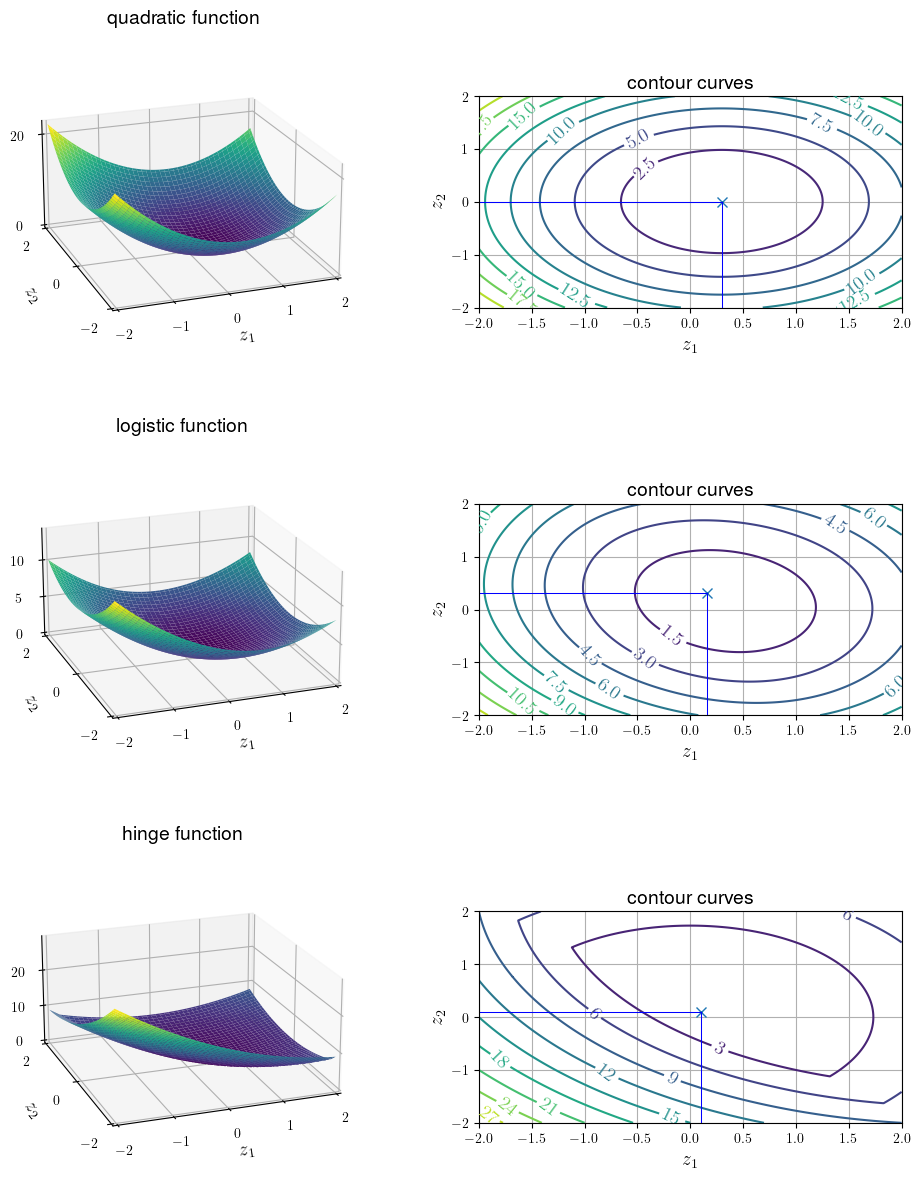

In [12]:
# quadratic function g(z)
# g(z) = sigma_d^2 -2r_{du}' z + z'R_u z

sigma_d2 = 0.5
Ru = np.zeros((2, 2))
Ru[0, 0] = np.random.rand() + 1  # diagonal Ru with entries randomly chosen over [1,2]
Ru[1, 1] = np.random.rand() + 1
Ru = 2 * Ru

rdu = np.random.rand(2, 1)

k = 0
step = 0.01
min_value_quad = 1000
g = np.zeros((int(4 / step) + 1, int(4 / step) + 1))

for w1 in np.arange(-2, 2 + step, step):
    k += 1
    m = 0
    for w2 in np.arange(-2, 2 + step, step):
        m += 1
        w = np.array([w1, w2])
        g[k - 1, m - 1] = sigma_d2 - 2 * np.dot(rdu.T, w) + np.dot(np.dot(w.T, Ru), w)
        if g[k - 1, m - 1] <= min_value_quad:
            min_value_quad = g[k - 1, m - 1]
            w_min_quad = [w1, w2]

print("Parameters for quadratic function")
print("Ru:\n", Ru)
print("rdu:\n", rdu)
print("sigma_d2:", sigma_d2)

print("Minimum value and minimizer location from closed-form expressions")
wo = np.linalg.inv(Ru) @ rdu
Ps = sigma_d2 - 2 * np.dot(rdu.T, wo) + np.dot(np.dot(wo.T, Ru), wo)
print("Ps:", Ps)
print("wo:", wo)

print("Minimum value and minimizer location from the mesh")
print("min_value_quad:", min_value_quad)
print("w_min_quad:", w_min_quad)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# figure 5 (strong-convex functions and contour lines; has 3 subplots)
# quadratic risk subplot
fig = plt.figure(figsize=(12, 15))
ax1 = fig.add_subplot(321, projection='3d')
W1, W2 = np.meshgrid(np.arange(-2, 2 + step, step), np.arange(-2, 2 + step, step))
surf = ax1.plot_surface(W1, W2, g.T, cmap='viridis', edgecolor='none')
ax1.set_xlabel(r'$z_1$', fontsize=14)
ax1.set_ylabel(r'$z_2$', fontsize=14)
ax1.set_zlabel(r'$g(z)$', fontsize=14)
ax1.set_title('quadratic function', fontsize=14)
ax1.set_box_aspect([1, 1, 0.5])  # Adjust the z-axis scaling here 
ax1.view_init(elev=20, azim=-110) # change the axis orientation to fit the figure in the book
ax1.set_xticks(np.arange(-2,3,1))
ax1.set_xlim([-2,2])
ax1.set_yticks(np.arange(-2,3,2))
ax1.set_ylim([-2,2])
ax1.set_zticks(np.arange(0,21,20))

ax2 = fig.add_subplot(322)
contour = ax2.contour(W1, W2, g.T, levels=10)
ax2.clabel(contour, fontsize=14, inline=True)
ax2.set_xlabel(r'$z_1$', fontsize=14)
ax2.set_ylabel(r'$z_2$', fontsize=14)
ax2.set_title('contour curves', fontsize=14)
ax2.grid(True)
ax2.plot(wo[0], wo[1], marker='x', markersize=7, markeredgewidth=1)
ax2.plot([wo[0], wo[0]], [-2, wo[1]], 'b', linewidth = 0.75)
ax2.plot([-2, wo[0]], [wo[1], wo[1]], '-b', linewidth = 0.75)
ax2.set_box_aspect(0.5)  # Adjust the z-axis scaling here 

# logistic risk
h_logistic = np.array([1, 2])
h_hinge = np.array([5, 5])
rho = 2
gamma = 1

# finding approximate locations of minimizers using gradient-descent and
# subgradient algorithms for testing purposes
ws_logistic, ws_hinge, Ps_logistic, Ps_hinge = find_minimizers(rho, gamma, h_logistic, h_hinge)

# logistic function g(z)
# g(z) = (rho/2) \|z\|^2 + ln(1+exp(-gamma h'z);  logistic

h = h_logistic
k = 0
min_value_logistic = 1000
g = np.zeros((int(4 / step) + 1, int(4 / step) + 1))

for w1 in np.arange(-2, 2 + step, step):
    k += 1
    m = 0
    for w2 in np.arange(-2, 2 + step, step):
        m += 1
        w = np.array([w1, w2])
        a = np.exp(-gamma * np.dot(h.T, w))
        g[k - 1, m - 1] = (rho / 2) * (np.linalg.norm(w) ** 2) + np.log(1 + a)
        if g[k - 1, m - 1] <= min_value_logistic:
            min_value_logistic = g[k - 1, m - 1]
            w_min_logistic = np.array([w1, w2])

print('logistic function')
print('mininum value and minimizer location evaluated by gradient-descent')
print('Ps_logistic:', Ps_logistic)
print('ws_logistic:', ws_logistic)

print('mininum value and minimizer location evaluated from the mesh')
print('min_value_logistic:', min_value_logistic)
print('w_min_logistic:', w_min_logistic)

# logistic risk subplot
ax3 = fig.add_subplot(323, projection='3d')
W1, W2 = np.meshgrid(np.arange(-2, 2 + step, step), np.arange(-2, 2 + step, step))
surf = ax3.plot_surface(W1, W2, g, cmap='viridis', edgecolor='none')
ax3.set_xlabel(r'$z_1$', fontsize=14)
ax3.set_ylabel(r'$z_2$', fontsize=14)
ax3.set_zlabel(r'$g(z)$', fontsize=14)
ax3.set_title('logistic function', fontsize=14)
ax3.set_box_aspect([1, 1, 0.5]) 
ax3.view_init(elev=20, azim=-110) # change the axis orientation to fit the figure in the book
ax3.set_xticks(np.arange(-2,3,1))
ax3.set_xlim([-2,2])
ax3.set_yticks(np.arange(-2,3,2))
ax3.set_ylim([-2,2])
ax3.set_zticks(np.arange(0,11,5))

ax4 = fig.add_subplot(324)
contour = ax4.contour(W1, W2, g, levels=10)
ax4.clabel(contour, fontsize=14, inline=True)
ax4.set_xlabel(r'$z_1$', fontsize=14)
ax4.set_ylabel(r'$z_2$', fontsize=14)
ax4.set_title('contour curves', fontsize=14)
ax4.set_box_aspect(0.5)  # Adjust the z-axis scaling here 
ax4.grid(True)

ax4.plot(ws_logistic[0], ws_logistic[1], marker='x', markersize=7, markeredgewidth=1)
P1 = [ws_logistic[0], ws_logistic[0]]
P2 = [-2, ws_logistic[1]]
ax4.plot(P1, P2, 'b', linewidth = 0.75)
P1 = [-2, ws_logistic[0]]
P2 = [ws_logistic[1], ws_logistic[1]]
ax4.plot(P1, P2, 'b', linewidth = 0.75)
ax4.set_box_aspect(0.5)  # Adjust the z-axis scaling here 

# hinge risk
h = h_hinge
k = 0
B = 2
min_value_hinge = 1000
g = np.zeros((int(4 / step) + 1, int(4 / step) + 1))

for w1 in np.arange(-B, B + step, step):
    k += 1
    m = 0
    for w2 in np.arange(-B, B + step, step):
        m += 1
        w = np.array([w1, w2])
        a = np.dot(gamma * h.T, w)
        g[k - 1, m - 1] = (rho / 2) * (np.linalg.norm(w) ** 2) + np.max([0, 1 - a])
        if g[k - 1, m - 1] <= min_value_hinge:
            min_value_hinge = g[k - 1, m - 1]
            w_min_hinge = np.array([w1, w2])

print('hinge function')
print('mininum value and minimizer location evaluated by gradient-descent')
print('Ps_hinge:', Ps_hinge)
print('ws_hinge:', ws_hinge)

print('mininum value and minimizer location evaluated from the mesh')
print('min_value_hinge:', min_value_hinge)
print('w_min_hinge:', w_min_hinge)

# hinge risk subplot
ax5 = fig.add_subplot(325, projection='3d')
W1, W2 = np.meshgrid(np.arange(-B, B + step, step), np.arange(-B, B + step, step))
surf = ax5.plot_surface(W1, W2, g.T, cmap='viridis', edgecolor='none')
ax5.set_xlabel(r'$z_1$', fontsize=14)
ax5.set_ylabel(r'$z_2$', fontsize=14)
ax5.set_zlabel(r'$g(z)$', fontsize=14)
ax5.set_title('hinge function', fontsize=14)
ax5.set_box_aspect([1, 1, 0.5]) 
ax5.view_init(elev=20, azim=-110) # change the axis orientation to fit the figure in the book
ax5.set_xticks(np.arange(-2,3,1))
ax5.set_xlim([-2,2])
ax5.set_yticks(np.arange(-2,3,2))
ax5.set_ylim([-2,2])
ax5.set_zticks(np.arange(0,21,10))


ax6 = fig.add_subplot(326)
contour = ax6.contour(W1, W2, g, levels=10)
ax6.clabel(contour, fontsize=14, inline=True)
ax6.set_xlabel(r'$z_1$', fontsize=14)
ax6.set_ylabel(r'$z_2$', fontsize=14)
ax6.set_title('contour curves', fontsize=14)
ax6.set_box_aspect(0.5)  # Adjust the z-axis scaling here 
ax6.grid(True)

ax6.plot(ws_hinge[0], ws_hinge[1], marker='x', markersize=7, markeredgewidth=1)
P1 = [ws_hinge[0], ws_hinge[0]]
P2 = [-B, ws_hinge[1]]
ax6.plot(P1, P2, 'b', linewidth = 0.75)
P1 = [-2, ws_hinge[0]]
P2 = [ws_hinge[1], ws_hinge[1]]
ax6.plot(P1, P2, 'b', linewidth = 0.75)
ax6.set_box_aspect(0.5)  # Adjust the z-axis scaling here 

# Show the plots
plt.show()

**Figure 8.5** Examples of three strongly convex functions $g(z):\mathbb{R}^{2}\rightarrow \mathbb{R}$ with their contour lines. (*Top*) Quadratic function, (*Middle*) regularized logistic function; (*Bottom*) regularized hinge function. The locations of the minimizers are indicated by the $\times$ notation with horizontal and vertical lines emanating from them in the plots on the right.

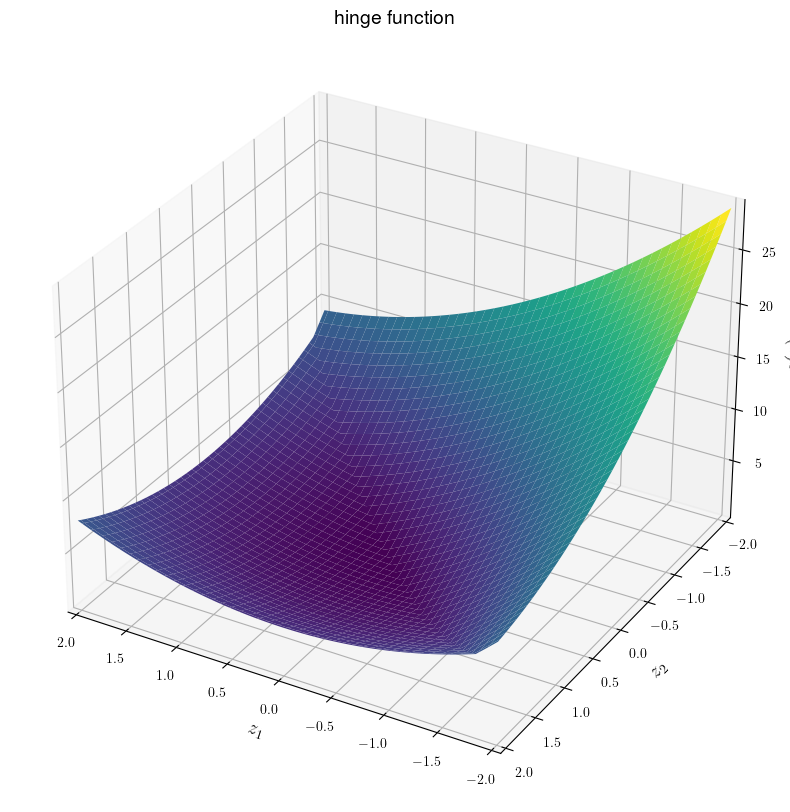

In [13]:
# figure 6 (larger plot for hinge risk)
plt.figure(figsize=[10,10])
axx = plt.subplot(111, projection='3d')
W1, W2 = np.meshgrid(np.arange(-B, B + step, step), np.arange(-B, B + step, step))
surf = axx.plot_surface(W1, W2, g, cmap='viridis', edgecolor='none')
axx.set_xlabel(r'$z_1$', fontsize=14)
axx.set_ylabel(r'$z_2$', fontsize=14)
axx.set_zlabel(r'$g(z)$', fontsize=14)
axx.set_title('hinge function', fontsize=14)
axx.set_xlim([-2,2])
axx.set_ylim([-2,2])
axx.invert_xaxis()
axx.invert_yaxis()
n = 1
plt.show()

**Figure 8.6** Surface plot for the same regularized hinge function from Fig.$~8.5$, albeit from a different viewpoint. The points of nondifferentiability occur at the locations satisfying $z_1+z_2=\frac{1}{5}\$.
